In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
%run Analise_survey.ipynb

In [3]:
dados.head()

,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,OITO_6,OITO_7,OITO_8,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,3300,0,24.0,5.0,2,2,0,2,0,3,4,0,0.0,2,7.0,9.0,36.0,2
1,22000,0,12.0,5.0,0,1,1,3,0,4,4,1,8.0,1,7.0,8.0,60.0,0
2,22000,0,30.0,9.0,0,4,0,0,4,3,0,1,0.0,2,7.0,8.0,24.0,0
3,16500,0,24.0,4.0,0,0,0,3,3,4,0,1,1.0,2,10.0,10.0,36.0,1
4,22000,1,12.0,10.0,0,0,0,3,2,4,0,4,8.0,2,0.0,0.0,36.0,0


In [4]:
#lista de varíaveis do cluster
lista_variaveis = ['TEMPO_ULTIMO_APARELHO', 'IMPORTANCIA'] 

#dataframe filtrado
df_filter = dados[lista_variaveis]

#preenche Nan com a mediana da coluna
imputer = SimpleImputer(strategy='median')
imputer.fit(df_filter)
temp = imputer.transform(df_filter)
df_filter_nan = pd.DataFrame(temp, columns=df_filter.columns)

In [5]:
df_filter_nan.head()

,TEMPO_ULTIMO_APARELHO,IMPORTANCIA
0,24.0,5.0
1,12.0,5.0
2,30.0,9.0
3,24.0,4.0
4,12.0,10.0


In [6]:
df_filter_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TEMPO_ULTIMO_APARELHO  159 non-null    float64
 1   IMPORTANCIA            159 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [7]:
print("Tenho Nan no dataset: {0}".format(df_filter_nan.isnull().values.any()))

Tenho Nan no dataset: False


In [8]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

In [9]:
#fit no algoritmo
three_means.fit(df_filter_nan)

C:\Users\fernando.fincatti\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=3)

In [10]:
saida = three_means.predict(df_filter_nan)

In [11]:
df_filter_nan['cluster'] = saida

In [12]:
df_filter_nan.head()

,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,cluster
0,24.0,5.0,2
1,12.0,5.0,0
2,30.0,9.0,2
3,24.0,4.0,2
4,12.0,10.0,0


In [16]:
df_filter_nan.cluster.value_counts(True)

1    0.408805
2    0.377358
0    0.213836
Name: cluster, dtype: float64

In [13]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = cluster.MiniBatchKMeans(n_clusters=k)
    three_means.fit(df_filter_nan)
    distortions.append(three_means.inertia_)

C:\Users\fernando.fincatti\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\fernando.fincatti\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\fernando.fincatti\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_T

In [14]:
distortions

[5872.090001975258,
 5988.000437121471,
 6013.024079478743,
 6119.574135002323,
 5983.104706319804,
 5755.333258348712,
 5764.441540479866,
 5986.804360856595,
 5751.582707605849,
 5988.827738212309,
 5990.852176120152,
 5760.360553745577,
 5770.449006148718,
 5749.559446941767,
 5980.401614989585,
 5746.272839882341,
 5983.726072257838,
 5980.469031007422,
 5980.775476823263]

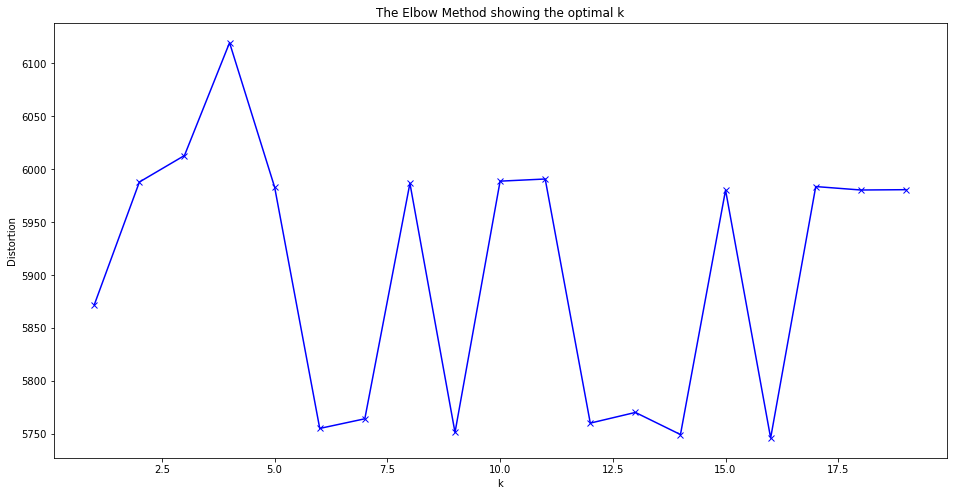

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()